_Lambda School Data Science_

# Polynomial & Log-Linear Regression

## "Linear" Regression?

Which of the following is a linear regression model?

![Functional Form Misspecification](http://www.ryanleeallred.com/wp-content/uploads/2018/08/functional-form-misspecification.jpg)

**All** of these functional forms can be fit using Linear Regression. The "Linear" in linear regression refers to the linear form of the equation.

### Linear Combinations

Remember when we rewrote vectors as a **linear combination** of scalars and unit vectors?

\begin{align}
v = \begin{bmatrix}2 \\ 3\end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3 \begin{bmatrix} 0 \\ 1\end{bmatrix} = 2\hat{i} + 3\hat{j} 
\end{align}

The syntax where we have a scalar (think coefficient) multiplying some vector (unit vector in this case) and all of them being added together is what makes this a linear combination.

### Linear Equations

A "Linear Equation" is any equation that takes the following form: 

\begin{align}
a_1x_1 + \ldots + a_nx_n + b = 0
\end{align}

Does this look familiar? A linear equation is one where we have $x_1, \ldots, x_n$ unknowns and $b, a_1, \ldots, a_n$ coefficients which are considered parameters of the equation. "The solutions of such an equation are the values that, when substituted to the unknowns, make the equality true."

[Linear Equation Wikipedia](https://en.wikipedia.org/wiki/Linear_equation)

Linear Regression is **linear** not because it can only plot straight lines and fit straight-line patterns in data, but because the form of the equation used to represent our regression is in the form of a **Linear Equation**.

### _So how do we fit curved data?_

# Example #1: Moore's Law dataset

#### Background
- https://en.wikipedia.org/wiki/Moore%27s_law
- https://en.wikipedia.org/wiki/Transistor_count

#### Scrape HTML tables with Pandas!
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html
- https://medium.com/@ageitgey/quick-tip-the-easiest-way-to-grab-data-out-of-a-web-page-in-python-7153cecfca58

#### More web scraping options
- https://automatetheboringstuff.com/chapter11/

### Imports

In [1]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Get data

In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Transistor_count', header=0)
print([table.shape for table in tables])

[(139, 6), (6, 6), (2, 5), (80, 6), (13, 7), (27, 3), (0, 2), (15, 7), (29, 2), (0, 2), (3, 2), (2, 2), (2, 2), (5, 2), (7, 2)]


In [3]:
moore = tables[0]
moore

,Processor,Transistor count,Date of introduction,Designer,Process,Area
0,Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
2,MOS Technology 6502,"3,510[3]",1975,MOS Technology,"8,000 nm",21 mm²
3,Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
4,Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
5,RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²
6,TMS 1000,8000,1974[4],Texas Instruments,"8,000 nm",11 mm²
7,Intel 8085,6500,1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,8500,1976,Zilog,"4,000 nm",18 mm²
9,Motorola 6809,9000,1978,Motorola,"5,000 nm",21 mm²


### Clean data

In [4]:
moore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 6 columns):
Processor               139 non-null object
Transistor count        135 non-null object
Date of introduction    139 non-null object
Designer                139 non-null object
Process                 139 non-null object
Area                    130 non-null object
dtypes: object(6)
memory usage: 6.6+ KB


In [5]:
feature = 'Date of introduction'
target  = 'Transistor count'

moore = moore.dropna(subset=[feature, target]).copy()

for column in [feature, target]:
    moore[column] = (moore[column]
                     .str.split('[').str[0]  # Remove citations
                     .str.replace(r'\D','')  # Remove non-digit characters
                     .astype(int))
    
moore = moore.sort_values(by=feature)

### Visualize

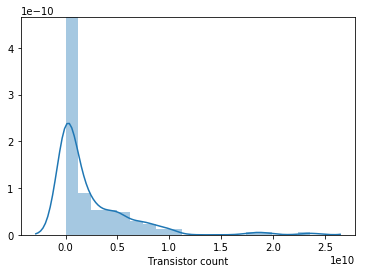

In [6]:
sns.distplot(moore[target]);

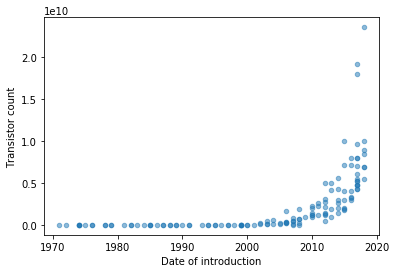

In [7]:
moore.plot(x=feature, y=target, kind='scatter', alpha=0.5);

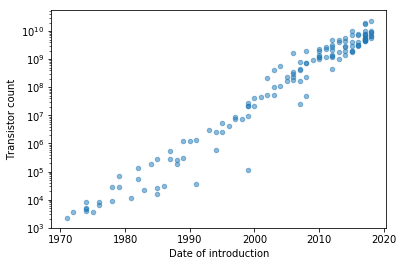

In [8]:
moore.plot(x=feature, y=target, kind='scatter', alpha=0.5, logy=True);

### Ordinary Least Squares Regression

R^2 0.3237840651645255


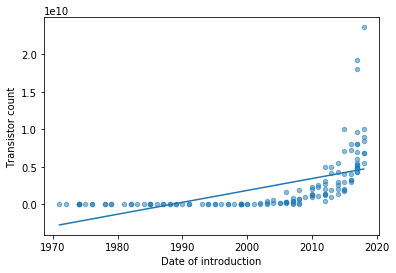

In [9]:
ax = moore.plot(x=feature, y=target, kind='scatter', alpha=0.5)

X = moore[[feature]]
y = moore[target]
model = LinearRegression()
model.fit(X, y)
ax.plot(X, model.predict(X))
print('R^2', model.score(X, y))

### Log-Linear Regression 

R^2 0.9612623242348991


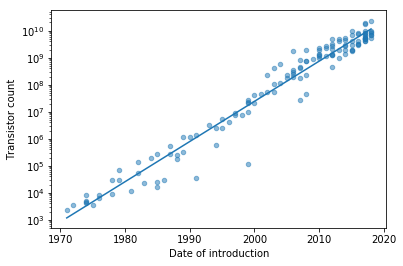

In [10]:
ax = moore.plot(x=feature, y=target, kind='scatter', alpha=0.5, logy=True)

X = moore[[feature]]
y = np.log(moore[target]) # Apply natural log function to the target
model = LinearRegression()
model.fit(X, y)
y_pred = np.exp(model.predict(X)) # Apply exponential function (inverse of natural log) to the predictions
ax.plot(X, y_pred) 
print('R^2', model.score(X, y))

R^2 0.9612623242348991


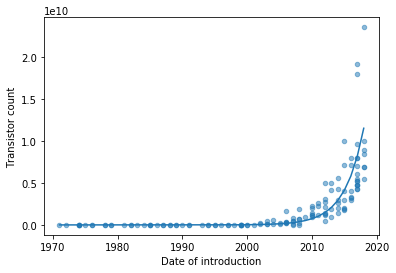

In [11]:
ax = moore.plot(x=feature, y=target, kind='scatter', alpha=0.5)
ax.plot(X, y_pred)
print('R^2', model.score(X, y))

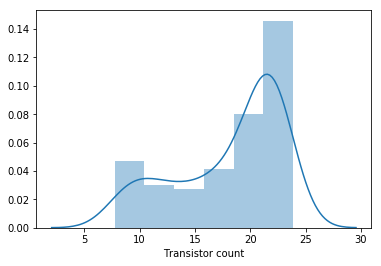

In [12]:
sns.distplot(y);

### Polynomial Regression

R^2 0.5294369690134937


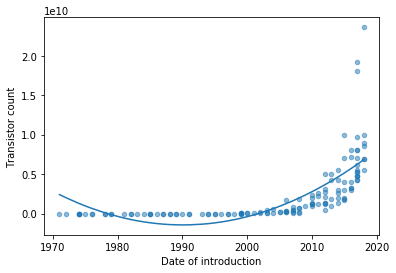

In [13]:
# Make polynomial feature
moore['Date of introduction ** 2'] = moore['Date of introduction'] ** 2

features = ['Date of introduction', 'Date of introduction ** 2']
X = moore[features]
y = moore[target]
model = LinearRegression()
model.fit(X, y)
ax = moore.plot(x='Date of introduction', y=target, kind='scatter', alpha=0.5)
ax.plot(X['Date of introduction'], model.predict(X))
print('R^2', model.score(X, y))

-4411663608283264.0x**0 + 6649748200044.422x**1 + -3341014092.630084x**2 + 559527.8562469716x**3
R^2 0.6135315087508402


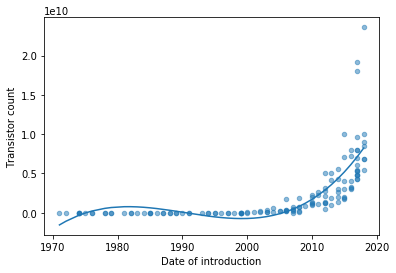

In [14]:
# Generalize for higher degree polynomials, and print equation

def polynomial_regression(degrees=2):
    
    # Make polynomial features
    feature = 'Date of introduction'
    polynomial_features = []
    for degree in range(2, degrees+1):
        name = f'{feature} ** {degree}'
        moore[name] = moore[feature] ** degree
        polynomial_features.append(name)
    
    features = [feature] + polynomial_features
    target  = 'Transistor count'
    X = moore[features]
    y = moore[target]
    model = LinearRegression()
    model.fit(X, y)
    
    ax = moore.plot(x=feature, y=target, kind='scatter', alpha=0.5)
    ax.plot(moore[feature], model.predict(X))
    betas = [model.intercept_] + model.coef_.tolist()
    equation = ' + '.join(f'{beta}x**{i}' for i, beta in enumerate(betas))
    print(equation)
    print('R^2', model.score(X, y))
    
polynomial_regression(3)

In [15]:
interact(polynomial_regression, degrees=(1,10));

interactive(children=(IntSlider(value=2, description='degrees', max=10, min=1), Output()), _dom_classes=('widg…

# Polynomial Regression, explained

Just as multiple regression was an extension of the bivariate case, Polynomial Regression is an extention of multiple regression and can be used to fit data to any (curved) shape. This is one of the reasons why data exploration is so important. You won't know that you need to fit a polynomial function to a feature unless you have examined its distribution.

[Why is polynomial regression considered a special case of multiple linear regression?](https://stats.stackexchange.com/questions/92065/why-is-polynomial-regression-considered-a-special-case-of-multiple-linear-regres)

# Example #2: King County Housing Data

[from Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
print(df.shape)
df.head().T

(21613, 21)


,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


## Find a "curved" feature in the dataset

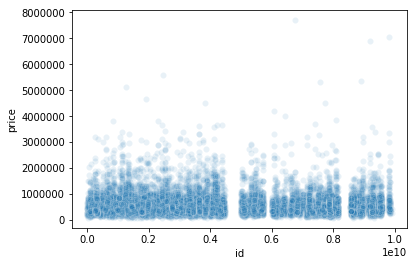

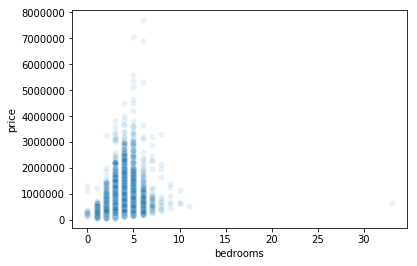

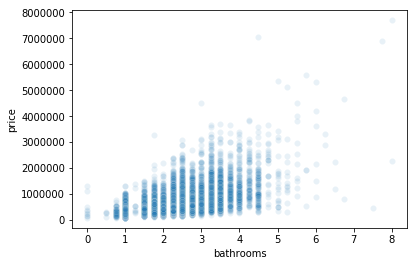

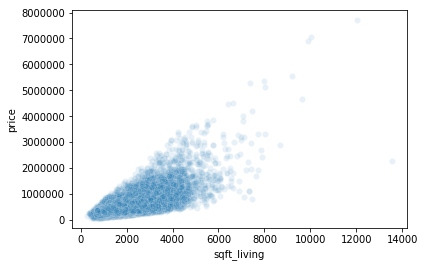

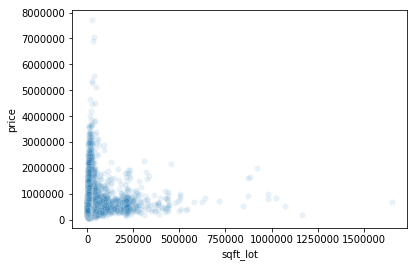

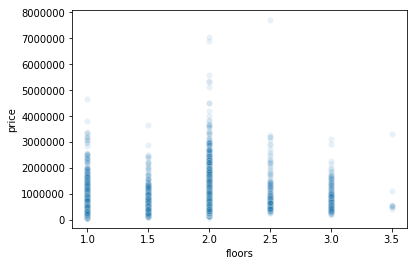

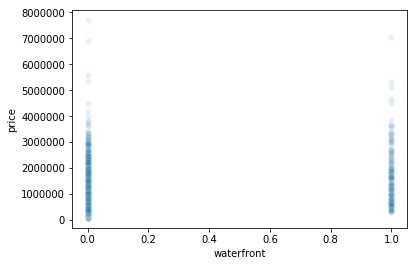

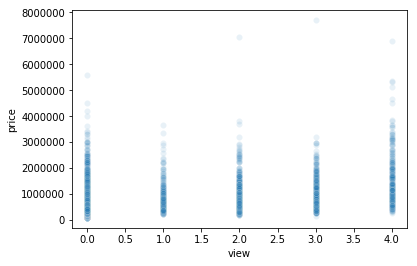

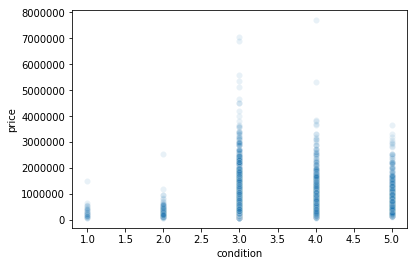

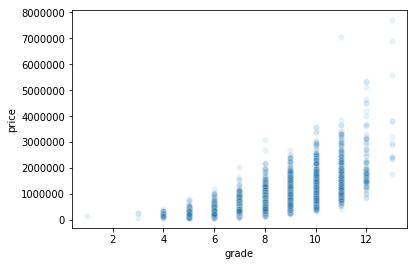

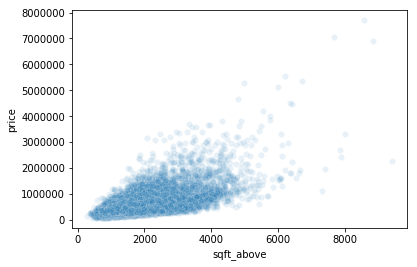

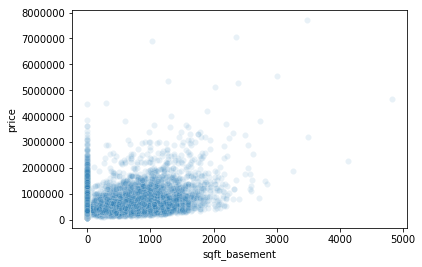

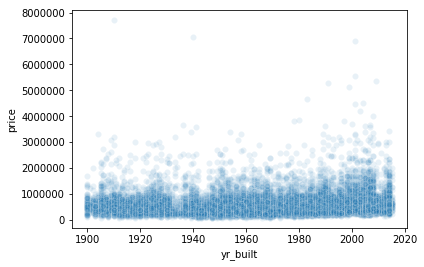

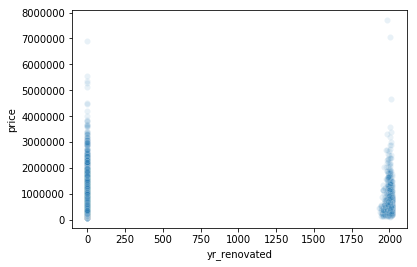

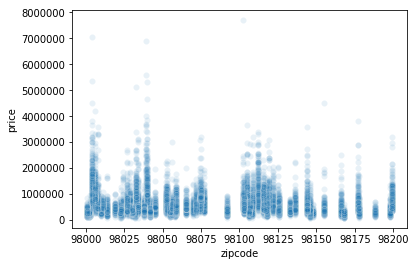

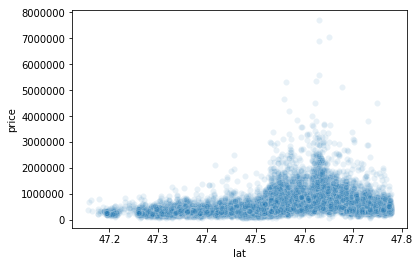

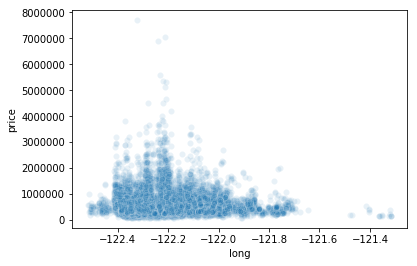

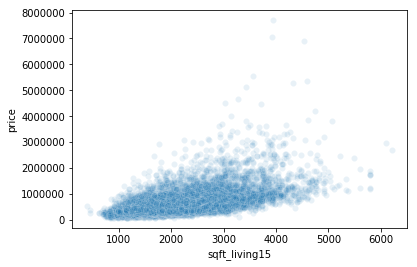

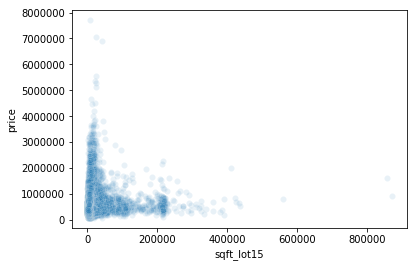

In [17]:
target = 'price'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## Make or "engineer" a new grade_squared feature 

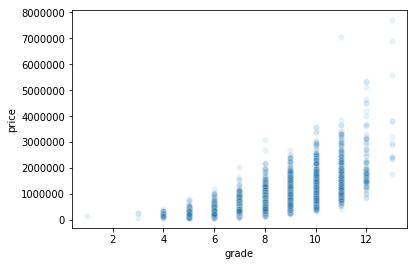

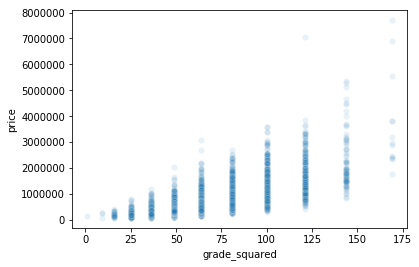

In [20]:
df['grade_squared'] = df['grade']**2
for feature in ['grade', 'grade_squared']:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## Test the fit of a polynomial regression to that feature

First we'll fit a regular bivariate regression line and calculate its $R^2$ to get a baseline. Since we want to know if this generated feature is improving our model or not we'll first run our code without it so that we have something to compare to. 

$price_i = \beta_0 + \beta_1grade_i + \epsilon_i$

In [21]:
# Separate dependent and independent variables
target = 'price'
features = ['grade']
y = df[target]
X = df[features]

def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)

Root Mean Squared Error 286950.2116930928
R^2 Score 0.45533658748438455
Intercept -1034439.1340801364
grade    205414.003682


## Lets try fitting grade_squared as a bivariate model

$price_i = \beta_0 + \beta_1grade^{2}_i + \epsilon_i$

In [22]:
# Separate dependent and independent variables
target = 'price'
features = ['grade_squared']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 277023.53301252594
R^2 Score 0.49236865455604306
Intercept -245193.6674386809
grade_squared    13060.024966


## Multiple Regression using both grade and grade_squred

$price_i = \beta_0 + \beta_1 grade_i + \beta_2grade^{2}_i + \epsilon_i$

In [23]:
# Separate dependent and independent variables
target = 'price'
features = ['grade', 'grade_squared']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 266657.067935898
R^2 Score 0.5296498328435824
Intercept 1551636.49333123
grade           -448957.161634
grade_squared     40406.000045


# How to find non-linear features

## 1) Domain Knowledge (think about your variables and hypothesize)

This is why having domain knowledge about the problem that you're trying to solve is something that's so important. In the context of home prices, variables that have a curved structure often are that way due to some form of diminishing returns increases in certain amenities. Lets think about the following variables:

- Lot Size:

The more land you're willing to buy all at once the cheaper it will be on a per-acre basis (Saving money when you buy in bulk). This trend carries through to small to medium sized lots but but with a more shallow curve.

![Price Per Acre](https://placercountyhomesandland.typepad.com/photos/uncategorized/price_per_acre_graph.png)

- Square Footage:

Square footage of a home sees a similar pattern. The value an additional 100 square feet in small homes (imagine the difference between say a 800 sq foot home and a 900 sq foot home) makes a big difference to buyers, where as an additional 100 square feet in a mansion probably isn't valued quite as highly. 

- Age:

Just like how the prices of new cars drop steeply in the first few years, the value of homes due to age drop quickly in the first few years after its built and then less quickly as time goes on. This is not a linear pattern and needs to be fitted by a polynomial model. 

## 2) Visual Inspection

We already talked about how generating scatterplots or other graphs is vital in our data exploration stage and can lead us to identify possible candidates for polynomials. Here I just wanted to share one more tip that can help you analyze scatterplots when you have a lot of data.

If you have so much data that it's hard to tell what's going on in your scatterplot, then sample your data and regenerate them to get a better idea.

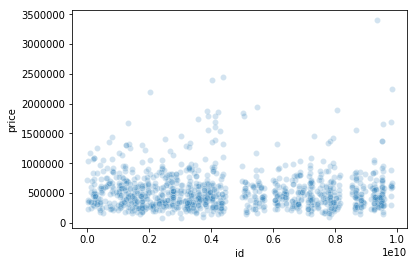

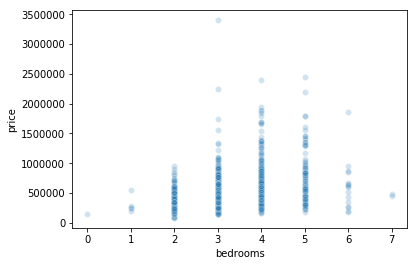

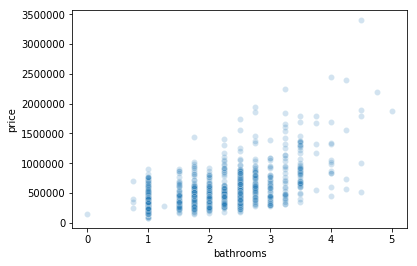

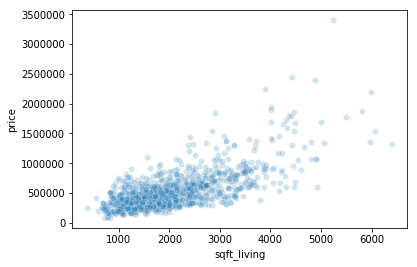

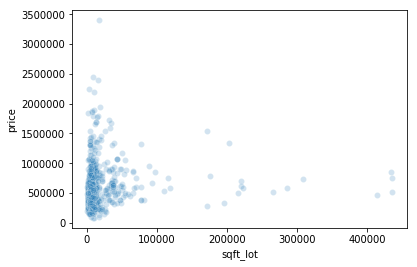

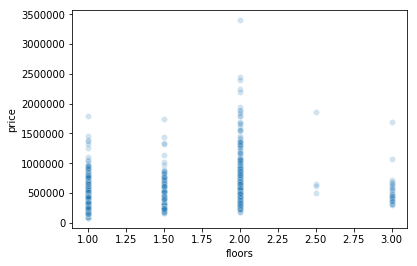

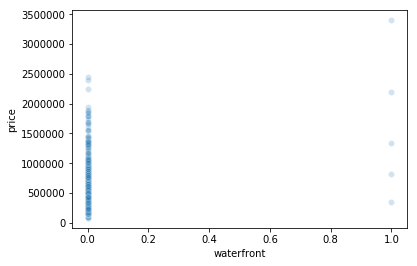

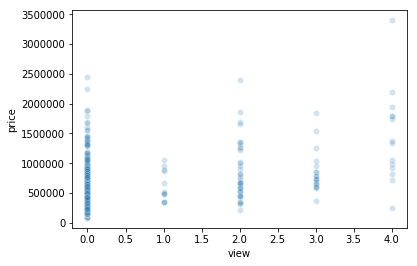

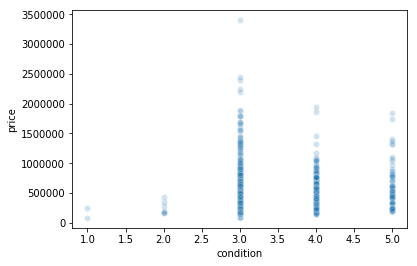

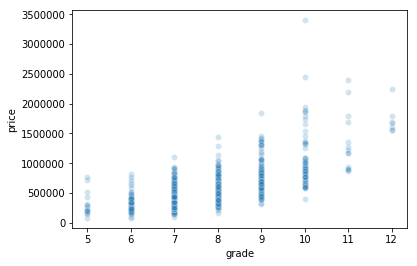

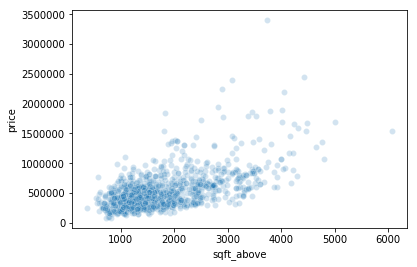

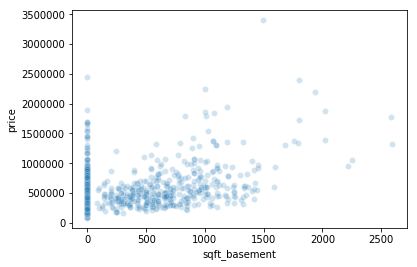

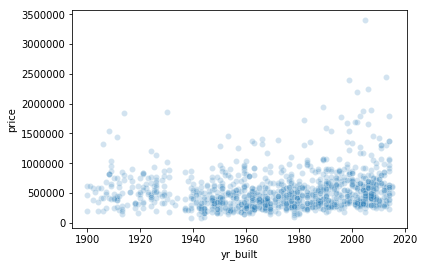

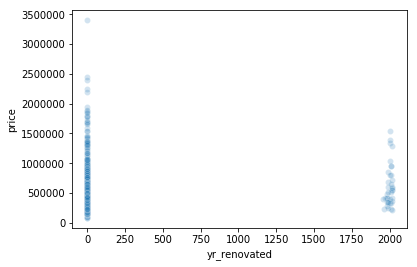

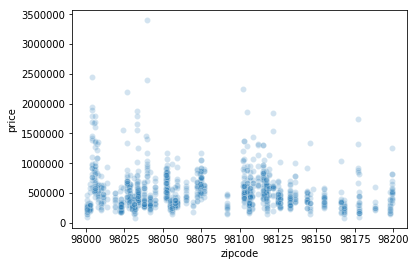

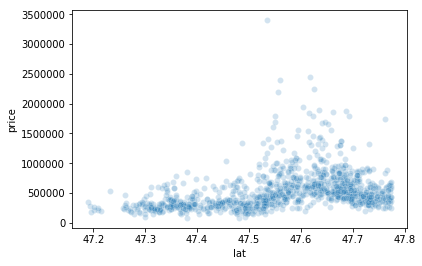

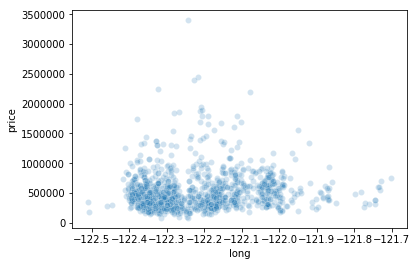

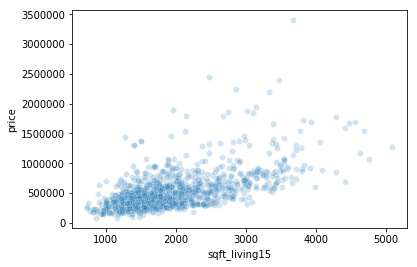

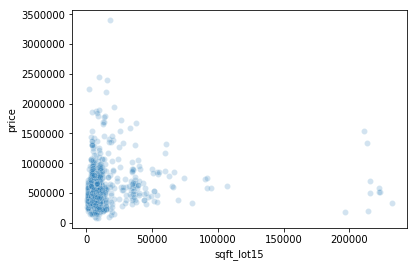

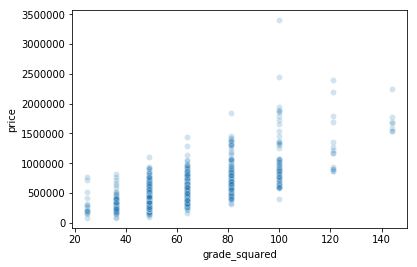

In [24]:
# Sample our dataframe to take 1/20th the values
sampled = df.sample(frac=0.05, replace=True, random_state=42)

target = 'price'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=sampled, alpha=0.2)
    plt.show()

## 3) Inspect the distribution of residuals

![Poor Fit Residuals](http://www.thejavageek.com/wp-content/uploads/2018/02/linear-regression-results.png)

## An Aside: The "Hedonic Housing Model"

Using Linear Regression to model home prices is a very common use of predictive linear regression modeling. It's so common fact that it has its own name: The Hedonic Housing Model. In the Hedonic Housing model it is well understood and reiterated that certain features tend to be curved in nature and these polynomial features (like the ones mentioned above) have all been well explored in real estate prediction circles. This is another of how domain knowledge can give you an edge. The best way to gain domain knowledge is to dive in and try and solve one particular kind of problem, and pick up little tips and tidbits as time goes on.

# Log-Linear Regression

In a log-linear regression model, we take the natural log of all of our y variable and use that as our y vector instead of the raw y values. Why would we do that?

<https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60861>

## 1) To reduce skew in y

Where we have variables with lots of relatively low values and few high values (like with home prices) we would expect to see our data more clustered on the left-hand side with a long tail extending to the right up into the expensive homes. The fact of the matter is that we will be able to make better predictions if we can normalize our data to some degree and one way to do this is by taking the natural log of it. 

In [25]:
df['ln_price'] = np.log(df['price'])

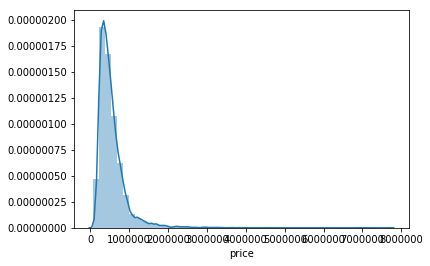

In [26]:
sns.distplot(df['price']);

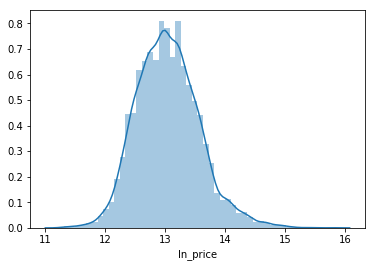

In [27]:
sns.distplot(df['ln_price']);

## New distribution of variables

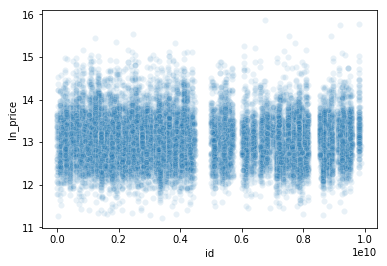

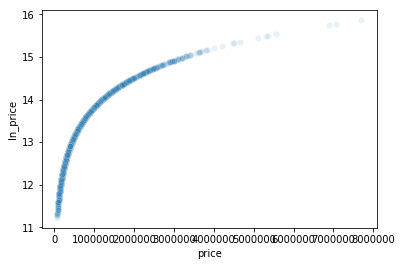

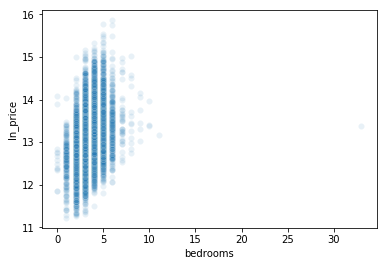

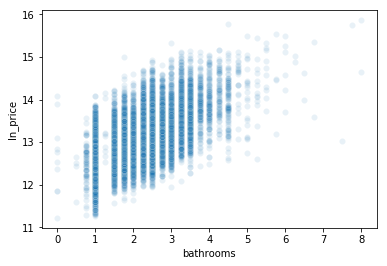

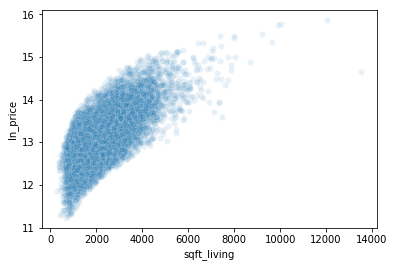

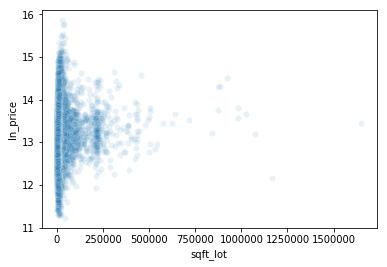

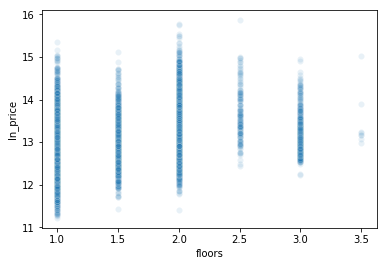

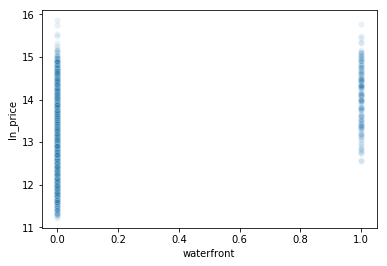

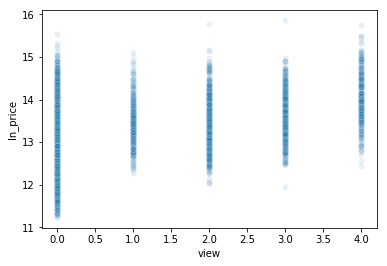

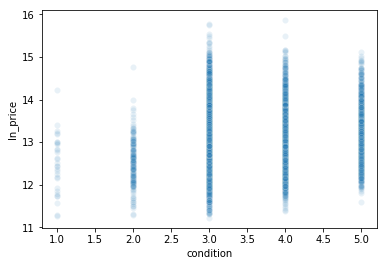

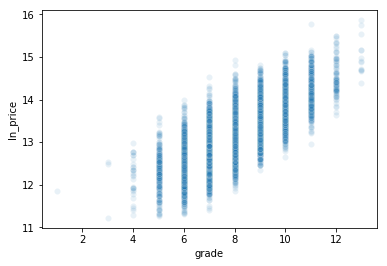

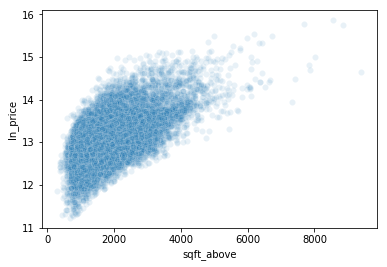

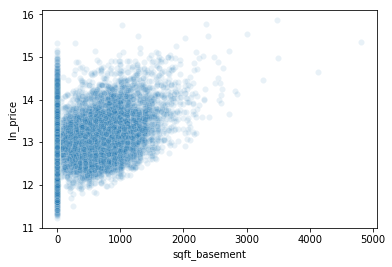

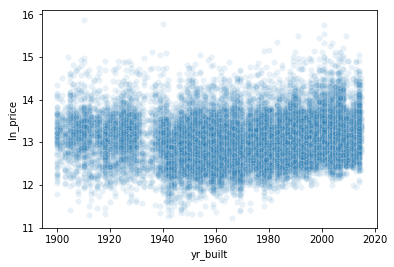

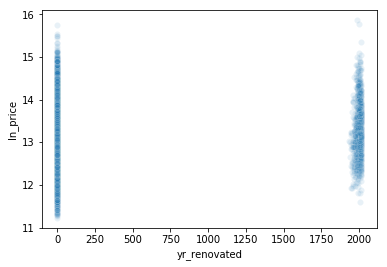

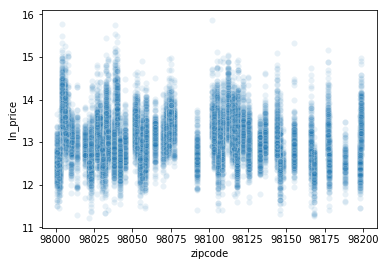

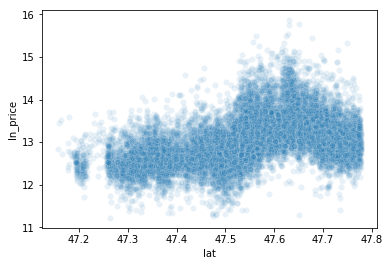

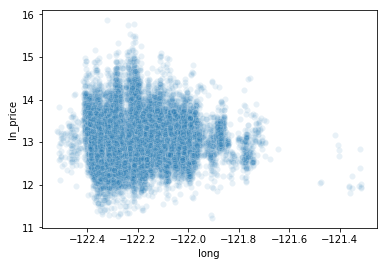

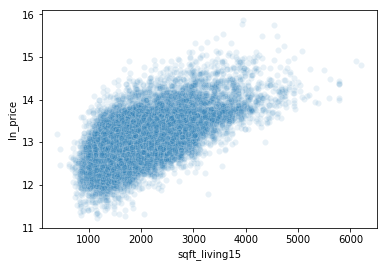

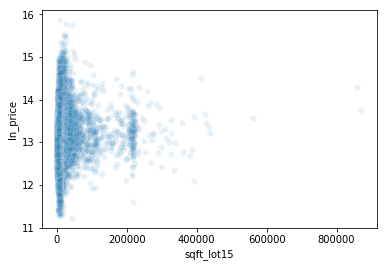

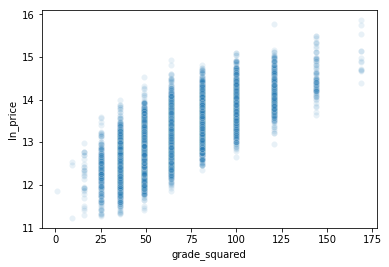

In [28]:
target = 'ln_price'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 2) Make coefficients easier to interpret

Transforming our price values in this way won't change our model's ability to generate predictions, but what it **will** do is change the interpretation of all of our x-coefficients. This will change our x-coefficients from have an elasticity type interpretation (a raw dollar amount change if there is a 1 unit increase in x) to having a percentage-terms interpretation. Lets demonstrate and talk about this further. 

## 3) Make our errors easier to interpret

Errors that have been calculated on variables that are in log form can also be interpreted roughly as percentage error. We've been using percentages all our lives and they have immediate meaning to us. This is why I prefer log-linear regression models when possible.

<https://people.duke.edu/~rnau/411log.htm>

Feature Engineering is a big topic in machine learning. We won't be able to cover every aspect of it today, but hopefully we can give you a strong idea of what it is and how to go about it. 

[Understanding Feature Engineering Part 1](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

Feature engineering is key to success in predictive modeling. It is the process by which we take existing features and combine them or alter them in ways that will expose additional signal to our model. Feature engineering is all about making the most of the data that we already had.

In [29]:
# Log-Linear Regression
# Separate dependent and independent variables
target = 'ln_price'
features = ['grade']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 0.37247953819990726
R^2 Score 0.5132441685961475
Intercept 10.641772753491399
grade    0.314011


This means that a one unit increase in the grade of a home increases its sale price by 31%. Often it is much easier to interpret coefficients in this manner than in the regular way. 

In [30]:
## Log-Linear Regression
# Separate dependent and independent variables
target = 'ln_price'
features = ['grade', 'grade_squared']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 0.37193109493824544
R^2 Score 0.5146765233562351
Intercept 11.260108662081194
grade            0.157550
grade_squared    0.009661


Our RMSE is really "small" now because it now represents error in percentage terms. We're on average about 37% off in our predictions of house prices.

Our coefficients can also be understood in percentage terms which makes the coefficients on our regression much more digestable at a glance. 

## A note about $R^2$

$R^2$ If we add any feature to our model (even nearly meaningless ones) our $R^2$ will improve. For this reason raw $R^2$ is not the ultimate measure of goodness of fit. It is informative but completely secondary to our Root-Mean-Squared-Error (in predictive modeling). While a higher $R^2$ is generally better, this isn't the thing that we're trying to optimize. We care more about minimizing RMSE than maximizing $R^2$

### "Kitchen Sink" models

You may hear the term "kitchen sink" regression model used. This refers to a regression model that throws every available explanatory variable into the model in an attempt to improve it without much thought to whether those variables should really be considered as affecting y. Kitchen Sink models will have a higher $R^2$ than others but will have higher standard errors (estimates about particular coefficients may be less precise). 

Therefore, you tend to see "Kitchen Sink" models when the only priority is predictive accuracy and not interpretability. 

### Alternative measures of Goodness-of-fit

Efforts have been made to improve upon $R^2$ due to these limitations. A metric called "Adjusted $R^2$" seeks to account for the number of explanatory variables included in a model and adjust $R^2$ accordingly. This is something that you can look up if you're curious. I just wanted to make you aware of it more than anything.

## A note about dirty linear regression data

### Linear Regression models can only process numeric values

### Your data must be free of NaN values before being passed to the algorithm 

(some data cleaning will be required in today's assignment)

# Feature Engineering

### Polynomial Regression requires feature engineering

You've already seen an example of feature engineering today when we created the $grade^2$ variable. We took an existing feature and used it to generate a new feature that exposed the data to the model in a slightly different way. 

"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data." - [Jason Brownlee](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)

### What features could we engineer with the King County dataset?

In [31]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


- **[date]** The date is in a format that is not super useful to us. If were to extract the year we could then take the difference between year and yr_built to find the age of the home. We could also include the squared term of the home age since we know (from our hedonic housing model domain knowledge) that home age typically is not linear. 
- **[bedrooms]** & **[bathrooms]** We maybe use a combined measure of bedrooms and bathrooms, or find an average room square footage by taking total number of rooms and dividing by the square footage. 
- **[sqft_living]** **[sqft_lot]** The difference between lot square footage and home square footage ought to also give us a rough measure of the size of the yard. Rough measures are fine as long as the engineered features expose some new shred of meaning to our model.
- **[floors]** We could calculate an average number of square feet per floor
- **[lat]** **[long]** There are all kinds of things that we could do with the latitude and longitude especially if we use some kind of outside API or external dataset to bring in new features associated with the location of the homes. This would take a lot of work but these could potentially be very powerful features.

### Kaggle is one of the best places to get feature engineering ideas

Look at Kernels: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

Here's just one example: https://www.kaggle.com/thevachar/house-price-regression-and-feature-engineering

Kaggle has definitions of the columns too: https://www.kaggle.com/harlfoxem/housesalesprediction

### Start with baseline, before feature engineering

In [32]:
df['ln_price'] = np.log(df['price'])
target = 'ln_price'
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'price', 'id'])
features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'grade_squared'],
      dtype='object')

In [33]:
# Non-Feature Engineered Baseline Model
y = df[target]
X = df[features]
run_linear_model(X, y)

Root Mean Squared Error 0.25435221591748447
R^2 Score 0.7730253401850277
Intercept -4.835187593788042
bedrooms        -1.582835e-02
bathrooms        7.245121e-02
sqft_living      1.018550e-04
sqft_lot         4.072438e-07
floors           7.141088e-02
waterfront       3.789904e-01
view             6.318041e-02
condition        5.880414e-02
grade            2.827884e-01
sqft_above       4.788322e-05
sqft_basement    5.397176e-05
yr_built        -3.653686e-03
yr_renovated     3.218883e-05
zipcode         -6.142525e-04
lat              1.396016e+00
long            -1.334281e-01
sqft_living15    9.908323e-05
sqft_lot15      -1.925880e-07
grade_squared   -7.991550e-03


### Engineer a new feature

In [34]:
df['age'] = 2015 - df['yr_built']

In [35]:
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'price', 'id'])
y = df[target]
X = df[features]
run_linear_model(X, y)

Root Mean Squared Error 0.2543522159174681
R^2 Score 0.7730253401850568
Intercept -8.516276278652889
bedrooms        -1.582835e-02
bathrooms        7.245121e-02
sqft_living      1.018550e-04
sqft_lot         4.072438e-07
floors           7.141088e-02
waterfront       3.789904e-01
view             6.318041e-02
condition        5.880414e-02
grade            2.827884e-01
sqft_above       4.788322e-05
sqft_basement    5.397176e-05
yr_built        -1.826843e-03
yr_renovated     3.218883e-05
zipcode         -6.142525e-04
lat              1.396016e+00
long            -1.334281e-01
sqft_living15    9.908323e-05
sqft_lot15      -1.925880e-07
grade_squared   -7.991550e-03
age              1.826843e-03


### Can you engineer more features?

## More topics

### Interaction Terms

An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable.

Lets look at an example where we were trying to estimate the level of satisfaction that a person would have when eating some kind of food with a condiment (sauce) on it.

$satisfaction_i = \beta_0 + \beta_1 food_i + \beta_2condiment_i + \epsilon$

Imagine that we have two foods: Ice Cream and Hot Dogs, and we also have to condiments: hot fudge and mustard. 

$\beta_1$ in this example is trying to capture the effect of on satisfaction between eating hot dogs vs eating ice cream, and $\beta_2$ is trying to capture the effect of putting hot fudge (chocolate sauce) vs mustard on your food. 

$\beta_2$ is a little more problematic in this scenario. If someone were to come up to you and ask if you preferred hot fudge or mustard on your food, how would you answer?

You would probably say something like **"IT DEPENDS ON WHAT THE FOOD IS."** This means that the effect of our x variables on y (satisfaction) depends on the combination of food and condiment. I don't know about you guys, but I wouldn't be as satisfied if I had hot fudge on my hot dog or mustard on my ice cream. 

An interaction terms is something that we add to our regression to account for these "It Depends" moments between two x variables. We do this by multiplying the two of them together or *interacting* them with each other to capture the implications of the different combinations taking place.

$satisfaction_i = \beta_0 + \beta_1 food_i + \beta_2condiment_i + \beta_3(food\times condiment_i) + \epsilon$

<http://statisticsbyjim.com/regression/interaction-effects/>

### Removing Outliers

To remove outliers via the 1.5*Interquartile-Range method. The first step is to calculate the IQR for each variable.

The IQR is the difference between the 25th and 75th percentiles of the feature.

Find the IQR and multiply it by 1.5

Then add the 1.5*IQR to the 3rd quartile (75th percentile). Anything above that range is an outlier.
Subtract 1.5*IQR from the 1st quartile (25th percentile). Anything below that value is also an outlier.

You want to minimize outliers in your dataset, so remove them by dropping observations that contain outliers in key features.

Typically you will wan to remove outliers before doing anything else with your dataset. We haven't focused on this strongly yet in the class, but coefficients get strongly biased by outliers so if you want to really have accurate predictions, remove outliers before you begin your feature engineering and modeling.

# Major Takeaways

- Polynomial Regression
  - Linear Regression can fit curved lines.
  - Including squared and cubed terms can improve fit and accuracy.

- Log-linear Regression
  - ln(y) helps normalize data with a skewed y variable.
  - ln(y) changes interpretation of coefficients and errors to be percentages.

- Feature Engineering
  - Generating Features improves model accuracy if done well.
  - This is where creativity and domain knowledge really pay off.
  - When you think that certain combinations of x variables might affect y differently than how they do separately. Include an interaction term.